In [1]:
import pandas as pd
import os
import geopandas as gpd
from geopandas.tools import sjoin
import psycopg2  # (if it is postgres/postgis)
%matplotlib inline
import matplotlib.pyplot as plt
# import pysal as ps
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
import geojson
# import shapely.wkt
# import unicodedata
# import osgeo.ogr
# from pysal import mapping as maps




C:\Users\DELL\Anaconda3\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



In [2]:
con = psycopg2.connect(dbname = "Ardhi", user = "postgres", password="kevoh", host="127.0.0.1", port = "5432")

sql = "select * from parcels"

df = gpd.GeoDataFrame.from_postgis(sql, con , geom_col='geom')

In [3]:
df.head(10)

,id,perimeter,area_ha,lr_no,status,geom,owner_id
0,26,186.653,0.203666,LR12872/26,in_use,"MULTIPOLYGON (((36.82365 -1.22242, 36.82387 -1...",None
1,24,188.470,0.204765,LR12872/24,in_use,"MULTIPOLYGON (((36.82383 -1.22312, 36.82377 -1...",None
2,23,187.388,0.201971,LR12872/23,in_use,"MULTIPOLYGON (((36.82324 -1.22330, 36.82377 -1...",None
3,22,187.348,0.202393,LR12872/22,in_use,"MULTIPOLYGON (((36.82371 -1.22371, 36.82364 -1...",None
4,21,187.927,0.204385,LR12872/21,in_use,"MULTIPOLYGON (((36.82312 -1.22391, 36.82364 -1...",None
5,20,186.899,0.201292,LR12872/20,in_use,"MULTIPOLYGON (((36.82305 -1.22421, 36.82358 -1...",None
6,19,186.649,0.200484,LR12872/19,in_use,"MULTIPOLYGON (((36.82299 -1.22451, 36.82352 -1...",None
7,18,187.740,0.203571,LR12872/18,in_use,"MULTIPOLYGON (((36.82293 -1.22481, 36.82346 -1...",None
8,17,187.107,0.202099,LR12872/17,in_use,"MULTIPOLYGON (((36.82287 -1.22511, 36.82340 -1...",None
9,16,186.704,0.201319,LR12872/16,in_use,"MULTIPOLYGON (((36.82281 -1.22541, 36.82333 -1...",None


In [4]:
cur = con.cursor()

sql = "select * from parcels" 

gdf = gpd.GeoDataFrame.from_postgis(sql, con, crs=4326)

In [5]:
df = gdf.copy()
df.head

<bound method NDFrame.head of     id  perimeter   area_ha       lr_no  status  \
0   26    186.653  0.203666  LR12872/26  in_use   
1   24    188.470  0.204765  LR12872/24  in_use   
2   23    187.388  0.201971  LR12872/23  in_use   
3   22    187.348  0.202393  LR12872/22  in_use   
4   21    187.927  0.204385  LR12872/21  in_use   
..  ..        ...       ...         ...     ...   
72  11    246.278  0.251211  LR12872/11  in_use   
73  10    222.125  0.197400  LR12872/10  in_use   
74   9    196.407  0.168898   LR12872/9  in_use   
75   8    204.204  0.203303   LR12872/8  in_use   
76  28    195.083  0.205847  LR12872/28  in_use   

                                                 geom owner_id  
0   MULTIPOLYGON (((36.82365 -1.22242, 36.82387 -1...     None  
1   MULTIPOLYGON (((36.82383 -1.22312, 36.82377 -1...     None  
2   MULTIPOLYGON (((36.82324 -1.22330, 36.82377 -1...     None  
3   MULTIPOLYGON (((36.82371 -1.22371, 36.82364 -1...     None  
4   MULTIPOLYGON (((36.82312 -1.

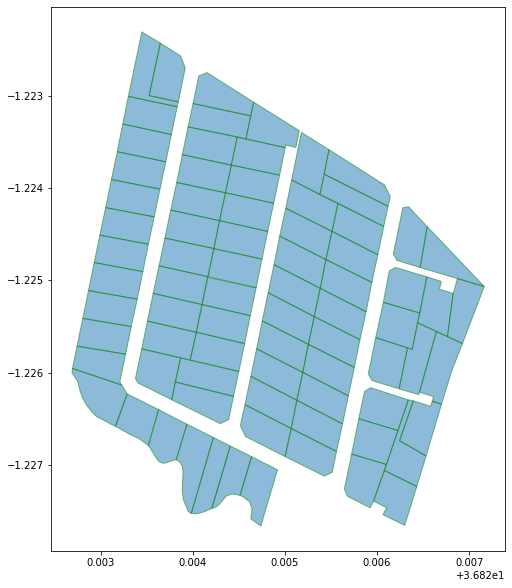

In [6]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='g')


In [7]:
df = df.crs

df

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# df = df.set_crs(epsg=4326)

# df = df.to_crs(epsg=3857)


In [9]:
m = folium.Map(location=[-1.286389, 36.817223], zoom_start=13 ,tiles='Stamen Terrain')

query = ("""SELECT jsonb_build_object ('type', 'FeatureCollection', 'features', jsonb_agg(features.feature)) FROM (SELECT           jsonb_build_object('type', 'Feature','geometry', ST_AsGeoJSON(geom)::jsonb, 'properties', 
         to_jsonb(inputs) - 'geom') AS feature FROM(SELECT * FROM counties where gid = 37) inputs) features;""")

conn = psycopg2.connect(dbname = "Ardhi", user = "postgres", password="kevoh", host="127.0.0.1", port = "5432")
cur = conn.cursor()

cur.execute(query)
counties = cur.fetchall()
extent = [-1.2935, 36.8683]
m = folium.Map(location=extent, zoom_start=12)
m.choropleth(geo_data=counties[0][0],name='Nairobi',column='countyname',
    key_on='gid',fill_color='yellow',fill_opacity='0.2',line_opacity='2',legend_name='Counties',
)
folium.LayerControl().add_to(m)   
m

C:\Users\DELL\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [10]:
# m=folium.Map(location=[-1.286389, 36.817223], tiles='Stamen Toner', zoom_start=13)

# query = ()

# conn = psycopg2.connect(dbname = "LandIs", user = "postgres", password="kevoh", host="127.0.0.1", port = "5432")
# cur = conn.cursor()

# cur.execute(query)
# counties = cur.fetchall()
# extent = [-1.2935, 36.8683]
# m.choropleth(
#     geo_data=counties[0][0],
#     name='County',
#     column='countyname',
#     key_on='gid',
#     fill_color='yellow',
#     fill_opacity='0.2',
#     line_opacity='2',
#     legend_name='Counties',
# )
# folium.LayerControl().add_to(m)   
# # m

In [11]:
# import kepler
# 

In [12]:
polys1 = gpd.GeoSeries([Polygon(data3)])
polys2= gpd.GeoSeries([Polygon(dta)])
# polys2

NameError: name 'Polygon' is not defined

In [ ]:
df1 = gpd.GeoDataFrame({'geometry':polys1, 'slabel':82, "plabel":8})
df2 =gpd.GeoDataFrame({'geometry':polys2, 'slabel':81, "plabel":8})
# df2

In [ ]:
ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.5)

In [ ]:
res_union = df1.overlay(df2, how='union')

In [ ]:
pip uninstall pygeos